# GLM group maps and tables

In [107]:
# Imports
import os
from nilearn.glm import threshold_stats_img
from nilearn import plotting
import matplotlib.pyplot as plt
import numpy as np
from nilearn.reporting import get_clusters_table
from nilearn.image import math_img
from mni_to_atlas import AtlasBrowser
atlas = AtlasBrowser("AAL3")

In [108]:
# Settings
#data_dir = '/SCRATCH/users/alexandresayal/BIDS-BRAINPLAYBACK-TASK2/'
data_dir = '/Volumes/T7/BIDS-BRAINPLAYBACK-TASK2/'
out_dir = os.path.join(data_dir,"derivatives","nilearn_glm")
out_dir_group = os.path.join(data_dir,"derivatives","nilearn_glm","group")
group_fig_dir = os.path.join(data_dir,"derivatives","nilearn_glm","group_figures")
group_tab_dir = os.path.join(data_dir,"derivatives","nilearn_glm","group_tables")

In [109]:
contrasts_renamed = ['All',
                     'JoyfulActivation', 'Nostalgia', 'Peacefulness', 'Power', 'Sadness', 'Tenderness', 'Tension', 'Transcendence', 'Wonder',
                     'Sublimity', 'Vitality', 'Unease', 'SublimityMinusVitality', 'VitalityMinusUnease', 'UneaseMinusSublimity']

In [110]:
# Threshold values
hc = 'fdr' # None, 'bonferroni', 'fdr'
ct = 25 # cluster threshold
alpha = 0.005 # p-value threshold

In [111]:
c_idx = 0
print(contrasts_renamed[c_idx])

All


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/plotting/html_document.py:102: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn(



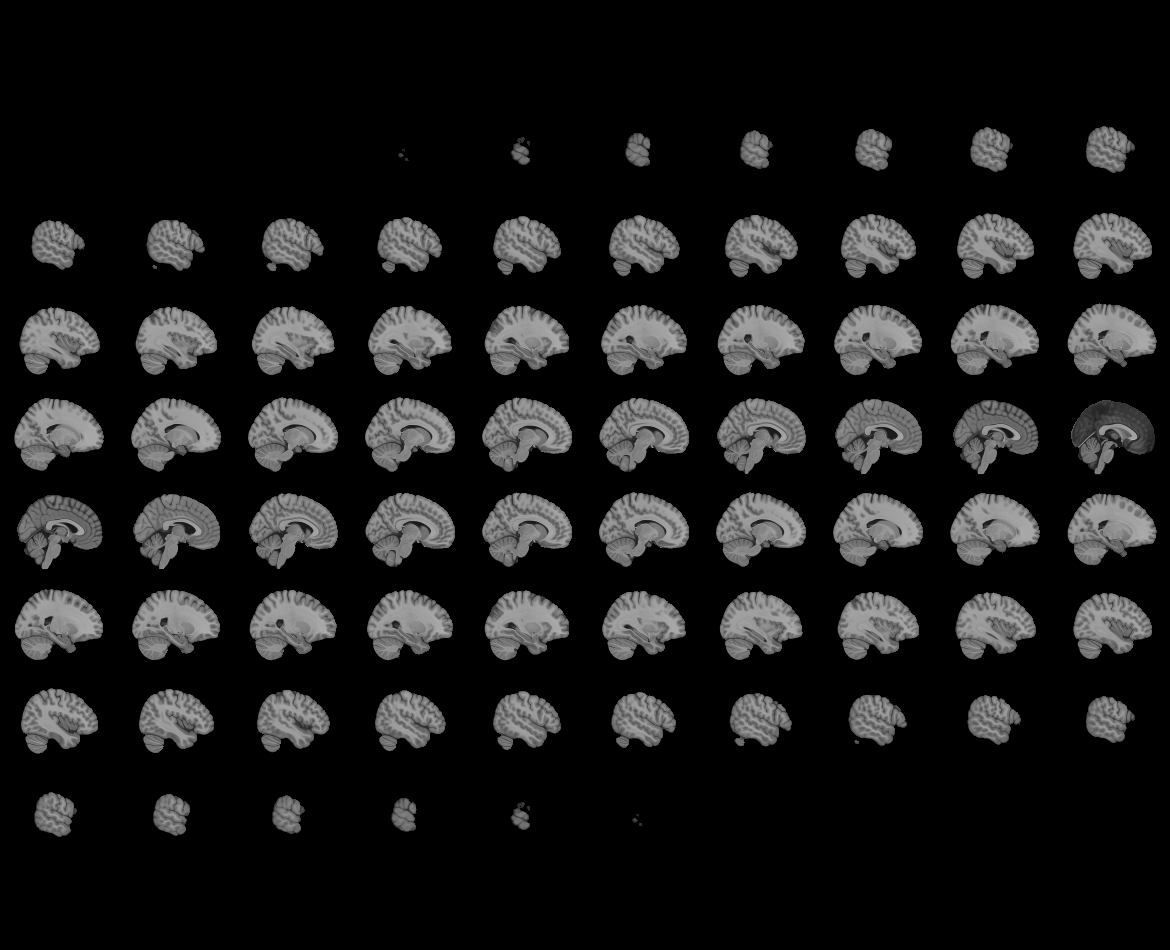
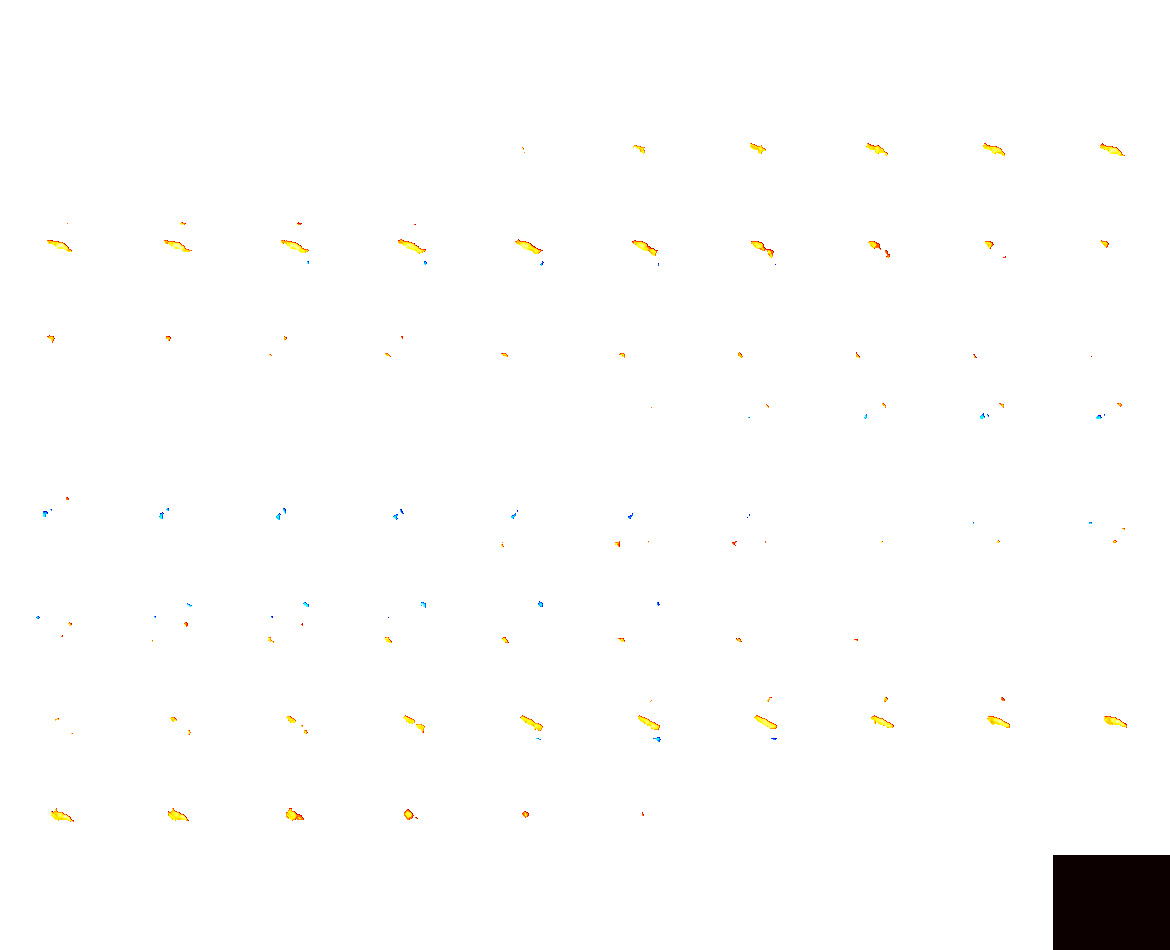

In [112]:
z_map_g = os.path.join(out_dir_group,
                       f'group_task-02a_stat-z_con-{contrasts_renamed[c_idx]}.nii.gz')

clean_map_g, threshold_g = threshold_stats_img(
    z_map_g, alpha=alpha, height_control=hc, cluster_threshold=ct
)

# threshold clean_map_g to only show positive values
#clean_map_g = math_img("np.maximum(img, 0)", img=clean_map_g)

# View map interactively
plotting.view_img(clean_map_g,
         threshold=threshold_g
        )

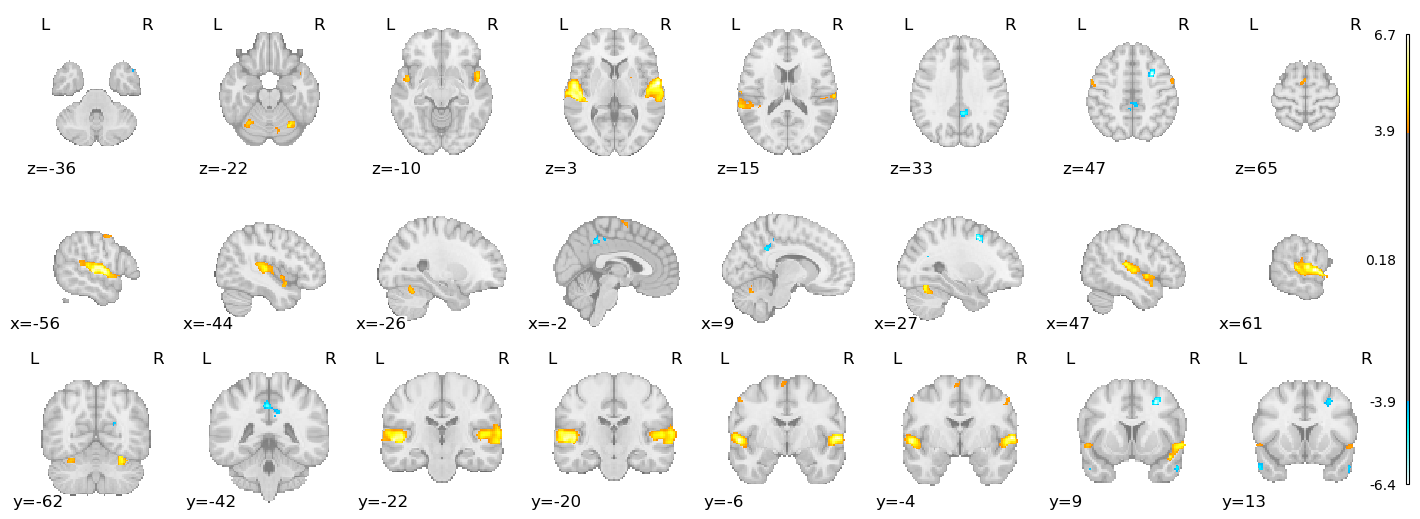

In [113]:
# beautiful mosaic figure
plotting.plot_stat_map(
    clean_map_g,
    threshold=threshold_g,
    display_mode="mosaic",
    cut_coords=8,
    colorbar=True,
    figure=plt.figure(figsize=(14, 5)),
    symmetric_cbar=False,
)

# Save the thresholded map figure
fig_file = os.path.join(group_fig_dir,
                        f'mosaic_stat-z_con-{contrasts_renamed[c_idx]}_{hc}-{alpha}_k-{ct}.png')
plt.savefig(fig_file, bbox_inches='tight')

In [114]:
# Cluster table
table_g,cluster_map_g = get_clusters_table(z_map_g, threshold_g, ct,
                                return_label_maps=True)

# AAL3 labelling
coordinates = table_g[['X','Y','Z']].to_numpy()
aal_labels = atlas.find_regions(coordinates, plot=False)

# Add the labels to the table
table_g['AAL3'] = aal_labels

# Export cluster table
table_g.to_csv(os.path.join(group_tab_dir,
                          f"clusters_con-{contrasts_renamed[c_idx]}_{hc}-{alpha}_k-{ct}.tsv"),sep='\t')
#print(table)
#print(table.to_latex())
table_g

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3),AAL3
0,1,61.5,-4.5,3.5,6.714934,12512,Temporal_Sup_R
1,1a,51.5,1.5,-4.5,6.117106,,Temporal_Sup_R
2,1b,61.5,-14.5,7.5,5.990803,,Temporal_Sup_R
3,1c,61.5,3.5,-0.5,5.960584,,Temporal_Pole_Sup_R
4,2,-56.5,-6.5,1.5,6.441223,14368,Temporal_Sup_L
5,2a,-58.5,-18.5,5.5,6.319438,,Temporal_Sup_L
6,2b,-48.5,-18.5,5.5,6.097069,,Temporal_Sup_L
7,2c,-50.5,1.5,-4.5,5.608090,,Temporal_Sup_L
8,3,29.5,-62.5,-22.5,5.266617,912,Cerebellum_6_R
9,4,17.5,-10.5,-16.5,5.252832,208,Hippocampus_R
